Image loaded successfully.


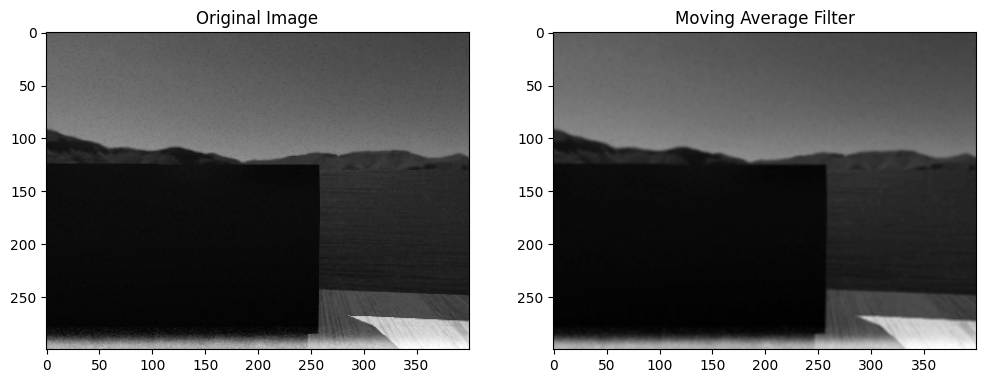

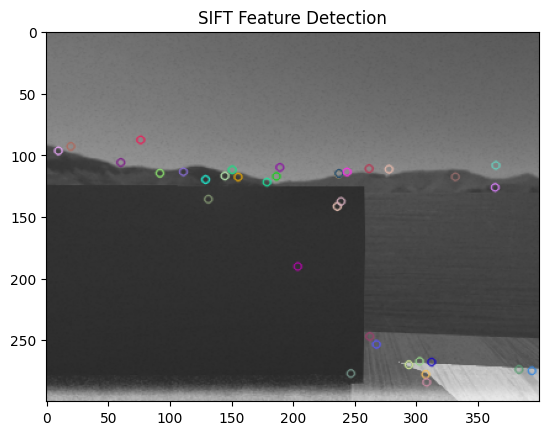

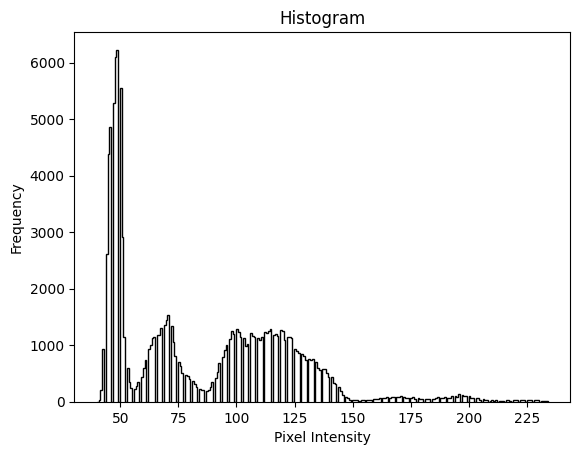

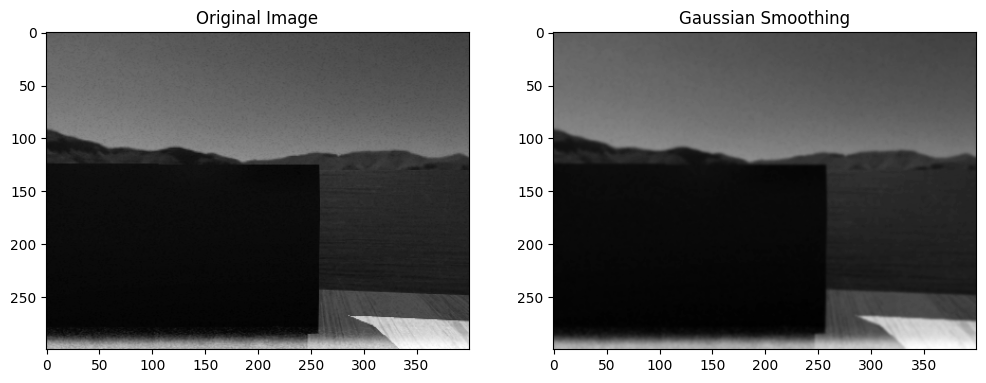

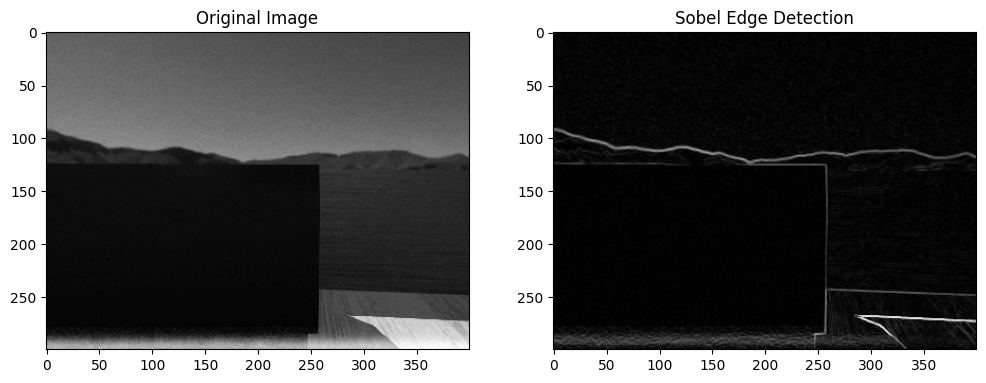

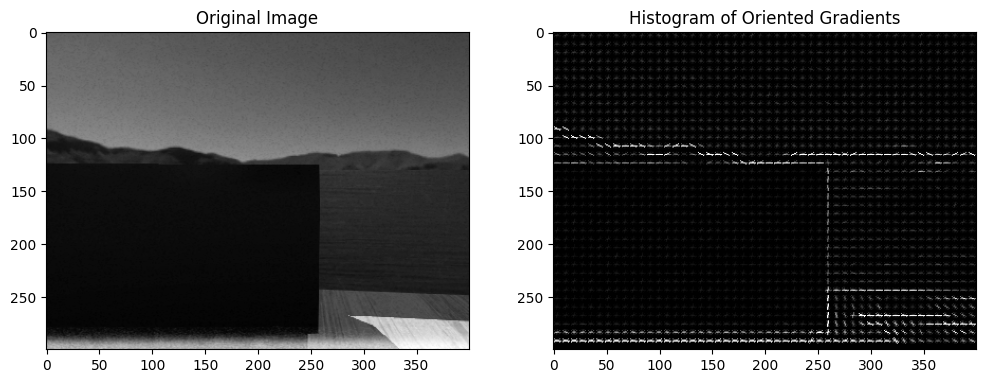

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Load Image
image = cv2.imread('red_blob.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Image not found!")
else:
    print("Image loaded successfully.")

# ------------------------------------------
# 1. Moving Average Filter
def moving_average_filter(img, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
    return cv2.filter2D(img, -1, kernel)

# Apply Moving Average Filter
moving_avg_img = moving_average_filter(image)

# Display result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(1, 2, 2), plt.imshow(moving_avg_img, cmap='gray'), plt.title("Moving Average Filter")
plt.show()

# ------------------------------------------
# 2. Feature Detection using SIFT
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(image, None)

# Draw Keypoints on Image
sift_img = cv2.drawKeypoints(image, keypoints, None)

# Display result
plt.imshow(sift_img, cmap='gray')
plt.title("SIFT Feature Detection")
plt.show()

# ------------------------------------------
# 3. Histogram Representation of Image
def plot_histogram(img):
    plt.hist(img.ravel(), bins=256, histtype='step', color='black')
    plt.title("Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

# Plot Histogram of Original Image
plot_histogram(image)
plt.show()

# ------------------------------------------
# 4. Gaussian Smoothing
def gaussian_smoothing(img, kernel_size=5, sigma=1.0):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), sigma)

# Apply Gaussian Smoothing
gaussian_smoothed_img = gaussian_smoothing(image)

# Display result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(1, 2, 2), plt.imshow(gaussian_smoothed_img, cmap='gray'), plt.title("Gaussian Smoothing")
plt.show()

# ------------------------------------------
# 5. Edge Detection using Sobel Filter
def sobel_edge_detection(img):
    grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    return cv2.magnitude(grad_x, grad_y)

# Apply Sobel Edge Detection
sobel_edges = sobel_edge_detection(image)

# Display result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(1, 2, 2), plt.imshow(sobel_edges, cmap='gray'), plt.title("Sobel Edge Detection")
plt.show()

# ------------------------------------------
# 6. Histogram of Oriented Gradients (HOG) Representation
def hog_feature_representation(img):
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    # Improve visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    return hog_image_rescaled

# Apply HOG Feature Representation
hog_img = hog_feature_representation(image)

# Display result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(1, 2, 2), plt.imshow(hog_img, cmap='gray'), plt.title("Histogram of Oriented Gradients")
plt.show()
